Dados Estruturados:
   CIDADE COMBUSTIVEL   POSTO  PRECO
0       A    gasolina  POSTO1   7.50
1       A      etanol  POSTO1   4.25
2       A      diesel  POSTO1   6.45
3       B    gasolina  POSTO1   9.05
4       B      etanol  POSTO1   4.05
5       B      diesel  POSTO1   6.50
6       C    gasolina  POSTO1   6.85
7       C      etanol  POSTO1   3.99
8       C      diesel  POSTO1   7.65
9       A    gasolina  POSTO2   6.90
10      A      etanol  POSTO2   4.00
11      A      diesel  POSTO2   6.50
12      B    gasolina  POSTO2   7.30
13      B      etanol  POSTO2   3.98
14      B      diesel  POSTO2   6.55
15      C    gasolina  POSTO2   7.25
16      C      etanol  POSTO2   3.98
17      C      diesel  POSTO2   6.05
18      A    gasolina  POSTO3   7.85
19      A      etanol  POSTO3   3.80
20      A      diesel  POSTO3   6.90
21      B    gasolina  POSTO3   6.75
22      B      etanol  POSTO3   4.05
23      B      diesel  POSTO3   4.49
24      C    gasolina  POSTO3   7.29
25      C      eta

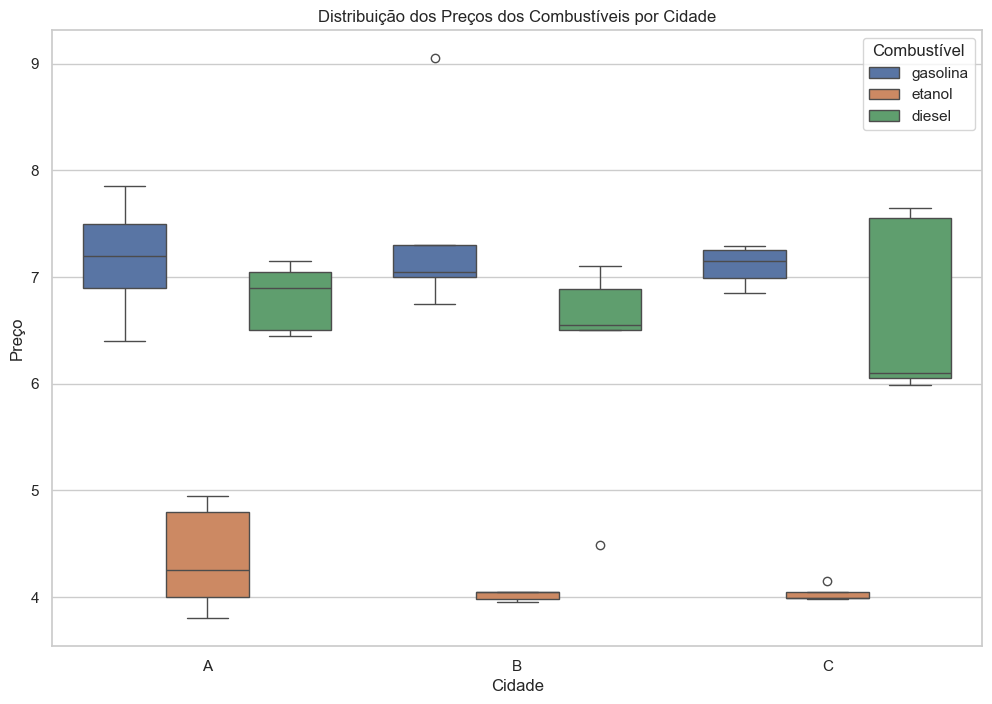

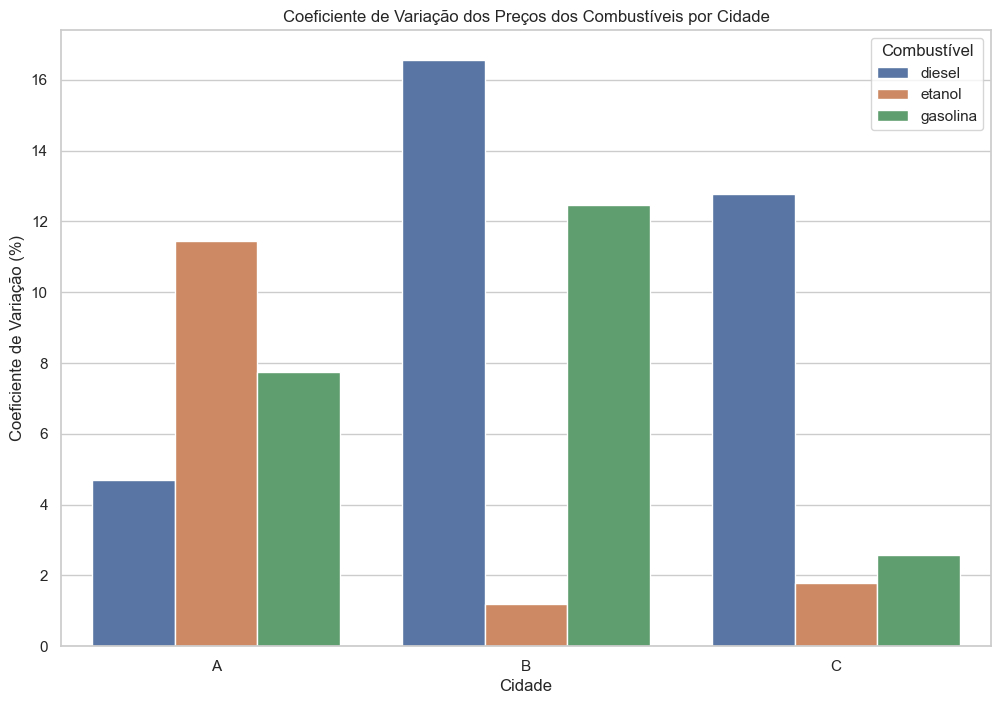

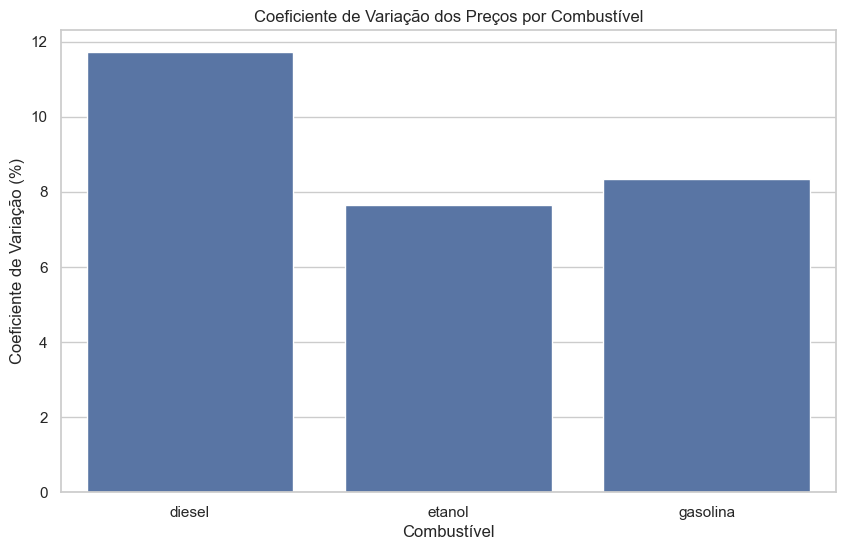

In [1]:
# Título: Análise de Conformidade/Variabilidade dos Preços de Combustíveis

# ## Introdução
# O objetivo desta análise é discutir sobre a conformidade/variabilidade dos preços dos combustíveis (Gasolina, Etanol e Diesel) em três cidades, com base nos dados coletados de cinco postos em cada cidade. A análise busca identificar se há uma política de uniformidade de preços entre os postos ou se há competitividade nos preços.

# ## Estrutura dos Dados
import pandas as pd

data = {
    'CIDADE': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'COMBUSTIVEL': ['gasolina', 'etanol', 'diesel', 'gasolina', 'etanol', 'diesel', 'gasolina', 'etanol', 'diesel'],
    'POSTO1': [7.5, 4.25, 6.45, 9.05, 4.05, 6.5, 6.85, 3.99, 7.65],
    'POSTO2': [6.9, 4, 6.5, 7.3, 3.98, 6.55, 7.25, 3.98, 6.05],
    'POSTO3': [7.85, 3.8, 6.9, 6.75, 4.05, 4.49, 7.29, 4.15, 6.1],
    'POSTO4': [6.4, 4.95, 7.15, 7.05, 4.05, 6.89, 6.99, 4.05, 7.55],
    'POSTO5': [7.2, 4.8, 7.05, 7, 3.95, 7.1, 7.15, 3.99, 5.99]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars=['CIDADE', 'COMBUSTIVEL'], var_name='POSTO', value_name='PRECO')

# Visualização Estruturada dos Dados
print("Dados Estruturados:")
print(df_melted)

# ## Cálculo dos Indicadores Estatísticos
# ### Estatísticas Descritivas
stats = df_melted.groupby(['CIDADE', 'COMBUSTIVEL'])['PRECO'].agg(['mean', 'median', 'std'])
stats['CV'] = stats['std'] / stats['mean'] * 100  # Coeficiente de variação em porcentagem

print("\nEstatísticas Descritivas por Cidade e Combustível:")
print(stats)

# ### Análise da Discrepância de Preços por Combustível
discrepancia = df_melted.groupby('COMBUSTIVEL')['PRECO'].agg(['mean', 'median', 'std'])
discrepancia['CV'] = discrepancia['std'] / discrepancia['mean'] * 100

print("\nDiscrepância dos Preços por Combustível:")
print(discrepancia)

comb_maior_discrepancia = discrepancia['CV'].idxmax()
maior_discrepancia_valor = discrepancia['CV'].max()

print(f"\nO combustível com maior discrepância de preço é o {comb_maior_discrepancia}, com um coeficiente de variação de {maior_discrepancia_valor:.2f}%.")

# ## Discussão dos Resultados
for cidade in stats.index.levels[0]:
    for combustivel in stats.loc[cidade].index:
        cv = stats.loc[(cidade, combustivel), 'CV']
        if cv < 5:
            print(f"Na cidade {cidade}, o combustível {combustivel} tem um CV de {cv:.2f}%, indicando conformidade nos preços.")
        else:
            print(f"Na cidade {cidade}, o combustível {combustivel} tem um CV de {cv:.2f}%, indicando competitividade nos preços.")

# ## Visualizações Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Boxplot dos preços por cidade e combustível
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='CIDADE', y='PRECO', hue='COMBUSTIVEL')
plt.title('Distribuição dos Preços dos Combustíveis por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Preço')
plt.legend(title='Combustível')
plt.show()

# Gráfico de barras do coeficiente de variação por cidade e combustível
plt.figure(figsize=(12, 8))
stats.reset_index(inplace=True)
sns.barplot(data=stats, x='CIDADE', y='CV', hue='COMBUSTIVEL')
plt.title('Coeficiente de Variação dos Preços dos Combustíveis por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Coeficiente de Variação (%)')
plt.legend(title='Combustível')
plt.show()

# Gráfico de barras do coeficiente de variação por combustível
plt.figure(figsize=(10, 6))
sns.barplot(data=discrepancia.reset_index(), x='COMBUSTIVEL', y='CV')
plt.title('Coeficiente de Variação dos Preços por Combustível')
plt.xlabel('Combustível')
plt.ylabel('Coeficiente de Variação (%)')
plt.show()
